In [124]:
%matplotlib inline 

import pandas as pd
import numpy as np
from scipy.stats import mode

from sklearn import cluster, metrics, preprocessing
from sklearn.cross_validation import cross_val_score, StratifiedKFold
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
matplotlib.style.use('ggplot') 

## 1. Format the Data

In [2]:
df = pd.read_csv('../../assets/datasets/airport2.csv')

Convert the class labels, in this case the airports, to numeric. *Remember*, we've truncated the airport dataset for simplicty to make this part easy! 

In [3]:
df.Airport.value_counts()

ANC    11
ATL    11
ABQ    11
Name: Airport, dtype: int64

In [4]:
def airportAssigner(x):
    if x == 'ANC':
        return 1
    if x == 'ATL':
        return 2
    if x == 'ABQ':
        return 3
df['Airport']=df['Airport'].apply(lambda x: airportAssigner(x))
df.head()

,Airport,Year,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions
0,3,2004,242,235,71,46
1,3,2005,221,190,61,33
2,3,2006,392,329,71,124
3,3,2007,366,304,107,45
4,3,2008,333,300,79,42


## 2. Plot the data

In [5]:
len(df)

33

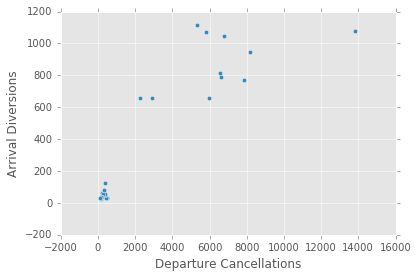

In [6]:
df.plot(kind='scatter',x = 'Departure Cancellations', y = 'Arrival Diversions')

## 3.  Perform a K-Means Clustering 

#### 3.1 Split the dataset into the attribute data and class labels

In [11]:
X = df.copy()
X.drop('Airport',1,inplace = True)
y = df['Airport']
y.head()

0    3
1    3
2    3
3    3
4    3
Name: Airport, dtype: int64

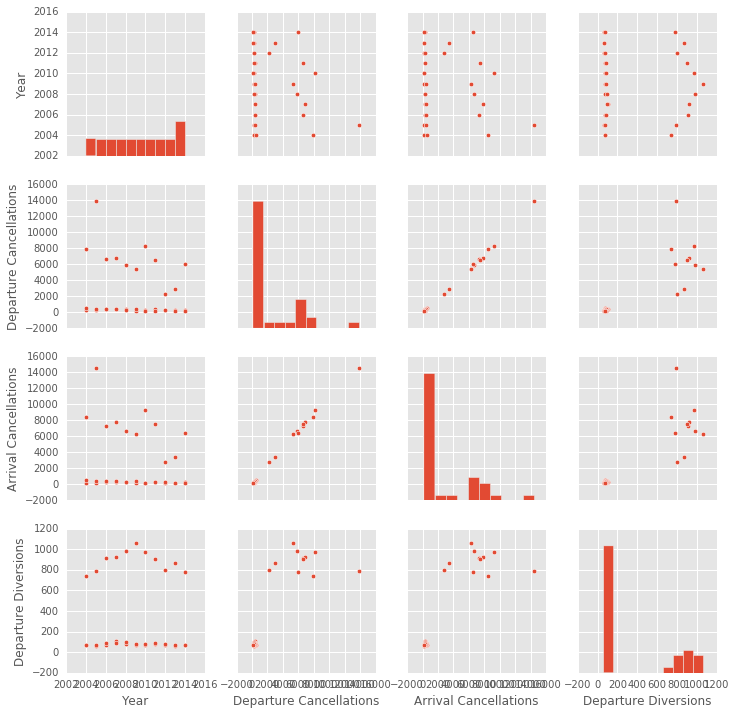

In [14]:
cols = X.columns[:-1]
sns.pairplot(df[cols])

#### 3.2 Conduct the k-means clustering

In [94]:
X_scaled=preprocessing.MinMaxScaler().fit_transform(X)

In [95]:
k = 3
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(X_scaled)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

#### 3.3 Compute the labels and centroids

In [96]:
# labels = kmeans.labels_
centroids = kmeans.cluster_centers_
inertia = kmeans.inertia_
clusters = kmeans.fit_predict(X_scaled)

In [97]:
labels = np.zeros_like(clusters)
for i in range(3):
    mask = (clusters == i)
    labels[mask] = mode(y[mask])[0]

In [98]:
metrics.silhouette_score(X_scaled, labels, metric='euclidean')

0.54025133042129092

#### 3.4 Format the resulting predicted "y" variables and check the accuracy score, classification report, and confusion matrix

In [99]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [100]:
X['Airports'] = labels
X.head()

,Year,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions,Airports
0,2004,242,235,71,46,1
1,2005,221,190,61,33,1
2,2006,392,329,71,124,1
3,2007,366,304,107,45,1
4,2008,333,300,79,42,1


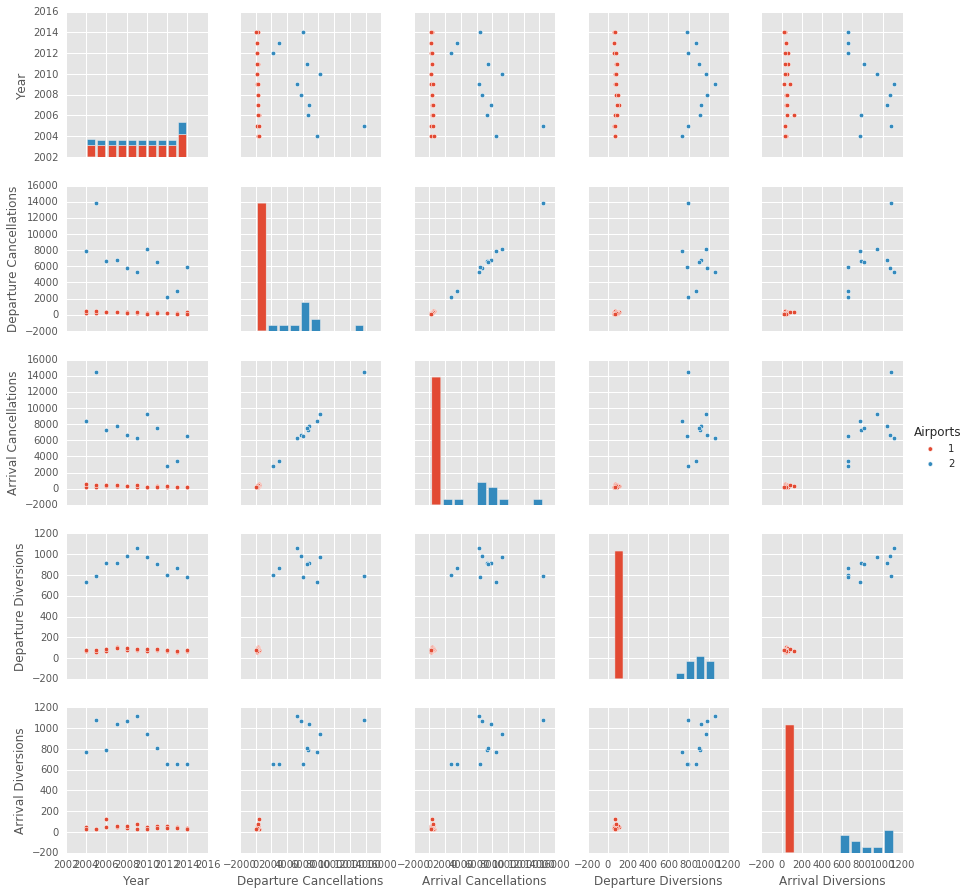

In [101]:
cols = X.columns[:-1]
sns.pairplot(X, x_vars=cols, y_vars= cols, hue='Airports')

In [102]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [103]:
print(classification_report(y, labels))

             precision    recall  f1-score   support

          1       0.50      1.00      0.67        11
          2       1.00      1.00      1.00        11
          3       0.00      0.00      0.00        11

avg / total       0.50      0.67      0.56        33



In [106]:
accuracy_score(y, labels)

0.66666666666666663

[[11  0  0]
 [ 0 11  0]
 [11  0  0]]


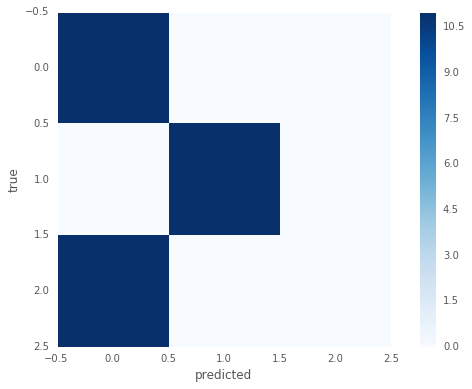

In [109]:
fig, ax = plt.subplots(figsize=(10,6))
print(confusion_matrix(y, labels))
plt.imshow(confusion_matrix(y, labels),
           cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.grid(False)
plt.ylabel('true')
plt.xlabel('predicted');

In [133]:
silhouette_score(X_scaled,labels)

0.54025133042129092

**Question**: What are we understand from this these performance metrics? 

## 4. Extra Trees Classifier

In [134]:
cv = StratifiedKFold(y, n_folds=10, shuffle=True, random_state=21)

In [137]:
et = ExtraTreesClassifier(class_weight='balanced', n_jobs=-1)
cross_val_score(et,X_scaled,labels,cv=cv,n_jobs=-1)# .mean().round(2)

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

## 5. KNN Classifier

In [138]:
knn=KNeighborsClassifier()
knn.fit(X_scaled,labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

## 6. Hierarchical Clustering

#### 6.1 Create the linkage for clustering

#### 6.2 Plot the Denrogram

## Extra Trees Classifier

## KNN Classifier